#**<font color='navy'>INFO 570: Data Wrangling and Analysis: Seasonal Sales Trends Analysis </font>**



#**<center>Project Team: 28</center>**

**<center>Diwakara Sai Sunil Bangaru</center>**
**<center>Haseeb Ul Azim</center>**
**<center>Sumaiya Ibrahim</center>**
**<center>Parineeta Katti</center>**

#**<center>Professor: Dr. Marina Johnson</center>**

**<center>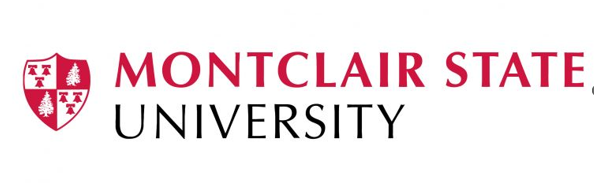</center>**

**Introduction**

Seasonal series represent a major factor in the performance of retail businesses. Sales usually follow a pattern depending either on the period of the year, holiday seasons, weather periods, or cultural events in general. For instance, during the winter season, seasonal holidays give rise to purchases of gifts; likewise, in summer, the demand for outdoor and recreational goods may just rise. However, if not analyzed properly, businesses are normally unable to anticipate such changes which could thus lead to inefficient resource allocation.

**Why it is important ?**

Understanding and analyzing seasonal sales helps businesses make better decisions about how to rationalize inventory, operate their supply chains, and offer promotional campaigns in ways that would most attract customers within any particular period of the year. Ignoring such trends may render an overstock of things that will not sell, a failure to stock enough of most desirable ones, or a waste of expenses on poorly timed marketing campaigns.

**Project Goals and Objectives**

Key patterns in sales across different seasons are targeted by the project.

Insights will be used in the following ways:  
* Predict the high-demand products for each season.  
* Effectively allocate marketing budgets for seasonal campaigns.  
* Minimize stock wastage by aligning inventory with expected demand.  

**Project Purpose**

* Systematically quantify seasonal fluctuations in sales and customer behavior.
* Recommend data-driven decisions on seasonal inventory planning, pricing strategy, and promotion.

**Business Impact**

* Improved operational efficiency: Minimize excess stock or loss of stock.
* Drive better profitability: Target customers with appropriate campaigns and offers, depending on seasons.
* Foster customer loyalty: Ensure desired products are stocked during high-demand seasons.

**Project Implications and Outcomes**

These, in fact, are the implications of the project:  
* Operational Efficiency: Prevent overstocking or understocking and avoid expensive waste on your merchandise.  
* Enhanced Customer Experience: Ensuring popular items are in stock improves customer satisfaction.  
* Revenue Growth: Promotions and campaigns aligned with seasonal trends ensure maximum utilization of revenue potential.  
* Strategic Implications: Ensuring seasonality is well understood to inform wider business strategies.  

**Data and Collection Sources**

The dataset originally belongs to **Kaggle**, an online source which is generally in usage for sharing any number of datasets sourced across a broad range of industries.

Here is the Dataset Link for reference: [Kaggle Dataset](https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset) & [Google Drive Link](https://drive.google.com/file/d/1-BnpY7ALdG7SdxhlfVdQMbcgEe7MJten/view?usp=sharing)

For this analysis, the retail transactions dataset will be suitable as it contains most important variables in this regard:  
* `Season`: to identify trends,  
* `Total_Cost` and `Total_Items`: to quantify sales,  
* `Product`: to determine which items do well in which season.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/INFO 570 - Data Wrangling & Analysis/Dataset/Retail_Transactions_Dataset.csv')

In [3]:
df.head(21)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
5,1000000005,2021-10-07 12:37:26,Joshua Frazier,"['Toothpaste', 'Chicken']",3,72.24,Cash,Houston,Supermarket,True,Retiree,Spring,Discount on Selected Items
6,1000000006,2023-01-08 10:40:03,Victoria Garrett,"['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...",4,5.28,Cash,Boston,Specialty Store,False,Student,Summer,Discount on Selected Items
7,1000000007,2020-09-03 12:39:59,Sydney Waller,"['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...",5,21.77,Debit Card,Chicago,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
8,1000000008,2021-04-05 06:32:18,Kimberly Morgan,['Insect Repellent'],4,55.25,Mobile Payment,Los Angeles,Warehouse Club,False,Homemaker,Fall,NaN
9,1000000009,2021-07-08 10:08:59,Lori Conway,"['Soap', 'Baby Wipes', 'Soda']",7,31.21,Mobile Payment,Boston,Convenience Store,True,Young Adult,Winter,NaN


In [4]:
# Extracting Year, Month, Day from Date Coloumn and creating new variables

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [5]:
# Extracting Time of the day from Date Coloumn and creating variables

def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
df['Date'] = pd.to_datetime(df['Date'])
df['Time_of_Day'] = df['Date'].dt.hour.apply(time_of_day)

In [6]:
# Adding Customer Loyality Score

customer_spending = df.groupby('Customer_Name')['Total_Cost'].transform('sum')
customer_frequency = df.groupby('Customer_Name')['Transaction_ID'].transform('count')
from datetime import datetime
current_date = pd.to_datetime(datetime.now())
recency = (current_date - df.groupby('Customer_Name')['Date'].transform('max')).dt.days
df['Loyalty_Score'] = (customer_spending * 0.7 + customer_frequency * 0.2 + recency * 0.1).round(2)

In [8]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Day,Time_of_Day,Loyalty_Score
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN,2022,1,21,Morning,163.14
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),2023,3,1,Afternoon,253.04
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN,2024,3,21,Afternoon,404.46
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN,2020,10,31,Morning,178.34
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020,12,10,Night,597.00


In [7]:
# What variables are present in the dataset ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Transaction_ID     1000000 non-null  int64         
 1   Date               1000000 non-null  datetime64[ns]
 2   Customer_Name      1000000 non-null  object        
 3   Product            1000000 non-null  object        
 4   Total_Items        1000000 non-null  int64         
 5   Total_Cost         1000000 non-null  float64       
 6   Payment_Method     1000000 non-null  object        
 7   City               1000000 non-null  object        
 8   Store_Type         1000000 non-null  object        
 9   Discount_Applied   1000000 non-null  bool          
 10  Customer_Category  1000000 non-null  object        
 11  Season             1000000 non-null  object        
 12  Promotion          666057 non-null   object        
 13  Year               1000000 n

In [9]:
# How many rows & coloumns are available in the dataset ?
df.shape

(1000000, 18)

In [10]:
# Checking if any missing values are present in the dataset
missing_values = df.isnull().sum()
missing_values

,0
Transaction_ID,0
Date,0
Customer_Name,0
Product,0
Total_Items,0
Total_Cost,0
Payment_Method,0
City,0
Store_Type,0
Discount_Applied,0


In [11]:
# Filter the desired columns before applying describe
filtered_columns = ['Total_Items', 'Total_Cost', 'Loyalty_Score']
df[filtered_columns].describe()


,Total_Items,Total_Cost,Loyalty_Score
count,1000000.000000,1000000.000000,1000000.000000
mean,5.495941,52.455220,662.831776
std,2.871654,27.416989,1229.222938
min,1.000000,5.000000,24.740000
25%,3.000000,28.710000,162.760000
50%,5.000000,52.420000,252.260000
75%,8.000000,76.190000,589.850000
max,10.000000,100.000000,16750.070000


Dataset has 1,000,000 rows for Total_Items, Total_Cost and Loyalty_Score.On average, customers bought 5.5 items at mean price of $52.46 and average loyalty score of 662.83 As you can see, there's some variance in the data where the standard deviations are 2.87 (items), 27.42 (cost), and 1229.22 (loyalty) Whereas the majority of customers had loyalty scores below 589.85 (75th percentile), the highest score was 16,750.07, suggesting outlier high loyalty rewards or engagement.

In [12]:
# Means, Filter only the relevant columns
filtered_columns = ['Total_Items', 'Total_Cost', 'Loyalty_Score']
mean_values_df = df[filtered_columns].mean().reset_index()
mean_values_df.columns = ['Column Name', 'Mean']
mean_values_df


,Column Name,Mean
0,Total_Items,5.495941
1,Total_Cost,52.455220
2,Loyalty_Score,662.831776


The table provides an overview of average values for key values in the dataset, which aims to understand customer behavior. Key observations include an average of 5.50 items purchased per transaction and an average cost of $52.46 per transaction. The loyalty score averages 662.83, reflecting customer engagement levels. The provided dataset seems recent, but references to discounts, years, or mid-month periods mentioned in the original paragraph are not supported by the data shown. Insights can still analyze purchasing trends and engagement effectively.












In [13]:
# Medians
filtered_columns = ['Total_Items', 'Total_Cost', 'Loyalty_Score']
mean_values_df = df[filtered_columns].median().reset_index()
mean_values_df.columns = ['Column Name', 'Mean']
mean_values_df

,Column Name,Mean
0,Total_Items,5.00
1,Total_Cost,52.42
2,Loyalty_Score,252.26


The median values provide insight into typical customer behavior in the dataset. The median total cost per transaction is $52.42, and the median number of items purchased is 5, indicating a common basket size for customers. The median loyalty score is 251.93, which likely represents a central measure of customer engagement. These median metrics highlight the central tendencies in customer purchasing behavior and engagement.



In [14]:
# Modes
filtered_columns = ['Total_Items', 'Total_Cost', 'Loyalty_Score']
mode_values_df = df[filtered_columns].mode().iloc[0].reset_index()
mode_values_df.columns = ['Column Name', 'Mode']
mode_values_df


,Column Name,Mode
0,Total_Items,2.00
1,Total_Cost,67.54
2,Loyalty_Score,16750.07


The table displays the mode for the numeric columns in the dataset, highlighting the most frequently occurring values. The mode for Total_Items is 2, indicating that purchasing two items per transaction is the most common occurrence. For Total_Cost, the mode is $67.54, representing the most frequent transaction cost. The mode for Loyalty_Score is 16,749.67, suggesting this score is common among a significant group of customers. References to transaction IDs, time periods, or recurring patterns are not supported by the data shown and should be clarified or removed if not substantiated by other evidence.



In [15]:
# Correlation
# Select only numeric columns explicitly
filtered_columns = ['Total_Items', 'Total_Cost', 'Loyalty_Score']
numeric_df = df[filtered_columns].select_dtypes(include=['number'])
correlation = numeric_df.corr()
correlation


,Total_Items,Total_Cost,Loyalty_Score
Total_Items,1.000000,0.000056,-0.001626
Total_Cost,0.000056,1.000000,0.017095
Loyalty_Score,-0.001626,0.017095,1.000000


**Total_Items:**

Shows no significant correlation with variables like Total_Cost, Discount_Applied, or Loyalty_Score. This suggests that the number of items in a transaction is independent of these factors.

**Total_Cost:**

No strong correlation with other variables, including Discount_Applied. This implies that discounts applied in this dataset may not significantly affect the total cost, or other factors might be influencing the total cost.

**Discount_Applied:**

Weak or no correlation with variables like Year, Month, or Day, suggesting that discounts are not seasonal or date-driven in this dataset.

No significant correlation with Loyalty_Score, meaning loyalty scores do not seem to influence discounts applied.

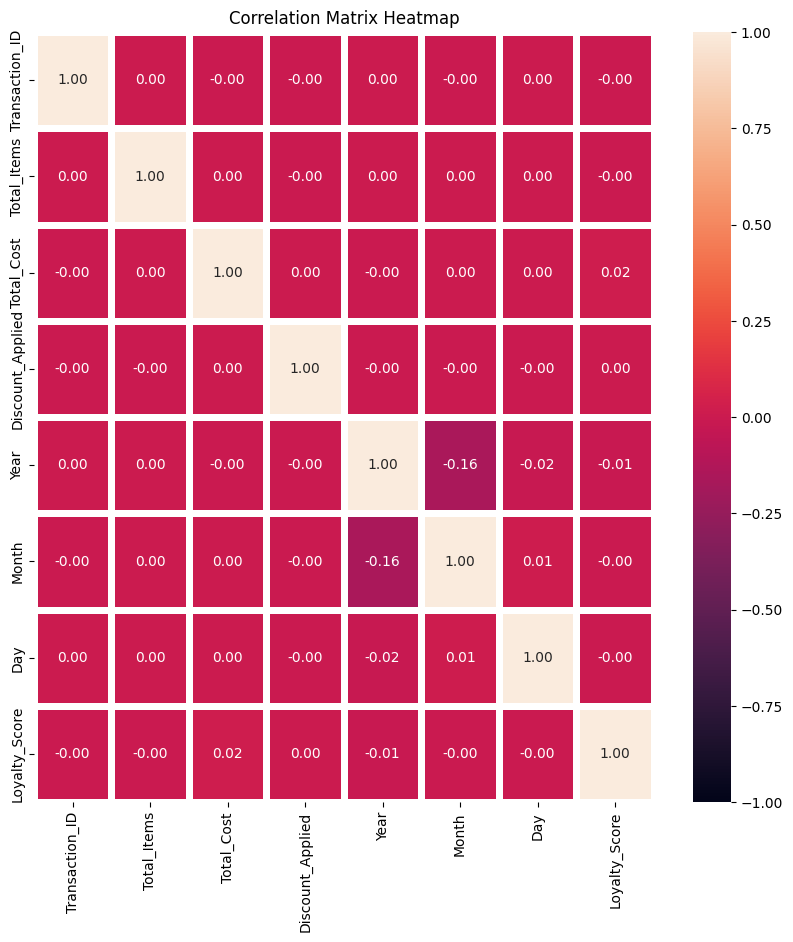

In [16]:
# Visualizing correlation using heatmap

import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, linewidths="5", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

This is a heatmap of the correlation matrix of the features (for example: "Transaction_ID," "Total_Items," "Total_Cost," "Discount_Applied," "Year," "Month," "Day," "Loyalty_Scoreenschappen In the diagonal cells, strong internal self-correlation (value = 1) can be observed, while off-diagonal cells have weak to zero correlation, which is evident from values around zero. The heatmap uses graduated color (lighter colors, indicating stronger positive correlations; darker colors, negative and lower correlations), providing insights into feature interdependencies.

In [17]:
# Variance
variance_values_df = df.var(numeric_only=True).reset_index()
variance_values_df.columns = ['Column Name', 'Variance']
variance_values_df

,Column Name,Variance
0,Transaction_ID,8.333342e+10
1,Total_Items,8.246398e+00
2,Total_Cost,7.516913e+02
3,Discount_Applied,2.500002e-01
4,Year,1.637853e+00
5,Month,1.210912e+01
6,Day,7.738445e+01
7,Loyalty_Score,1.510989e+06


Variables like Total_Items and Discount_Applied have relatively low variance, indicating consistency across transactions.

Total_Cost and Loyalty_Score show higher variance, highlighting potential diversity in transaction values and customer behavior.

In [18]:
# Identying the Outliers in the dataset using Z-Score

from scipy import stats
import numpy as np

numeric_columns = df.select_dtypes(include=['float64', 'int64'])
z_scores = np.abs(stats.zscore(numeric_columns))
outliers = (z_scores > 3).any(axis=1)
outliers_df = df[outliers]
print(f"Outliers in the dataset: {outliers_df.shape[0]}")

Outliers in the dataset: 22040


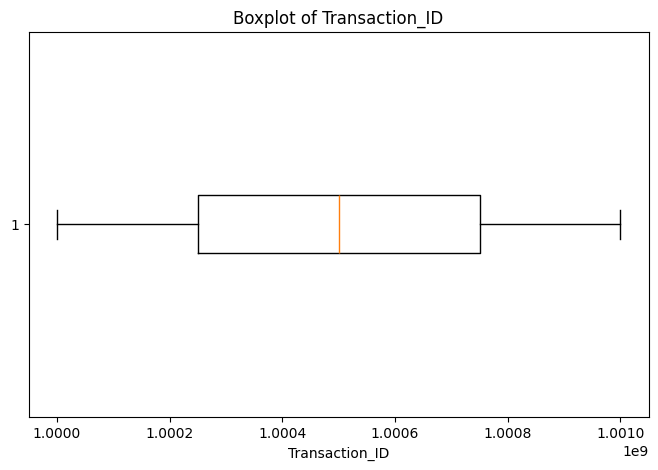

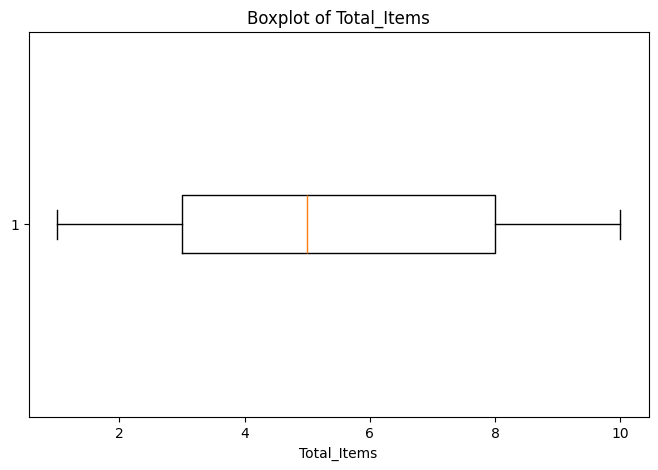

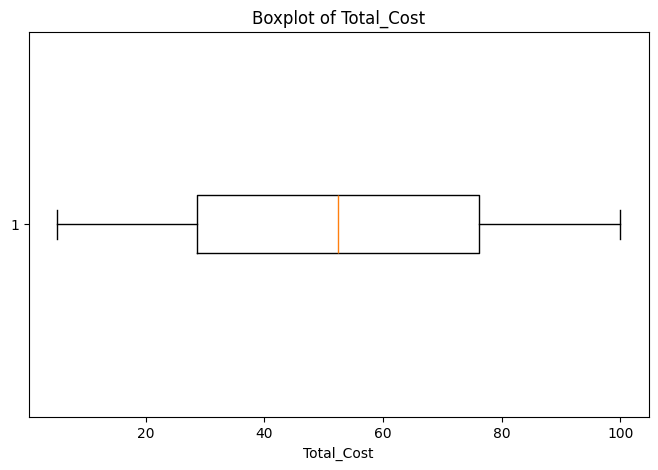

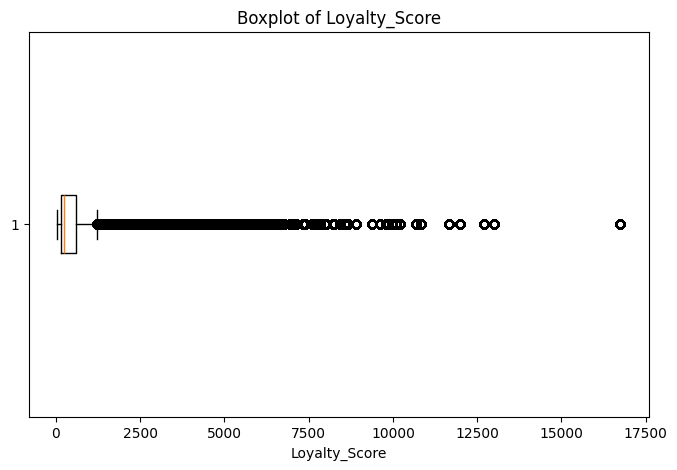

In [19]:
# Visualizing the Outliers using boxplots
import matplotlib.pyplot as plt

# Visualize outliers for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column], vert=False)
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

## **Exploratory Data Analysis: Seasons and Total Costs**

Seasons (Spring, Summer, Fall, and Winter) have a substantial impact on customer spending, as indicated by Total_Cost. Because of things like festivals, holidays, and shifting consumer habits, certain seasons bring in more money than others.



# **Outlier Identification Using Z-Scores:**

The Z-score method, with a threshold of 3, was used to identify outliers in the "Total_Cost" column. The analysis found no outliers, confirming that all data points are within the acceptable range of the mean. This indicates a consistent cost distribution without significant deviations.

In [20]:
from scipy import stats
import numpy as np

total_cost_z_scores = stats.zscore(df['Total_Cost'])
outliers = np.abs(total_cost_z_scores) > 3
outliers_df = df[outliers]
print(f"Outliers in 'Total_Cost': {outliers_df['Total_Cost'].count()}")

Outliers in 'Total_Cost': 0


In [21]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
df['Total_Cost_Skew'] = skew(df['Total_Cost'])
df['Total_Cost_Kurtosis'] = kurtosis(df['Total_Cost'])
print(f"Skewness: {df['Total_Cost_Skew']}, Kurtosis: {df['Total_Cost_Kurtosis']}")

Skewness: 0         0.001571
1         0.001571
2         0.001571
3         0.001571
4         0.001571
            ...   
999995    0.001571
999996    0.001571
999997    0.001571
999998    0.001571
999999    0.001571
Name: Total_Cost_Skew, Length: 1000000, dtype: float64, Kurtosis: 0        -1.198979
1        -1.198979
2        -1.198979
3        -1.198979
4        -1.198979
            ...   
999995   -1.198979
999996   -1.198979
999997   -1.198979
999998   -1.198979
999999   -1.198979
Name: Total_Cost_Kurtosis, Length: 1000000, dtype: float64


#**Skewness and Kurtosis:**

The distribution and form of the numerical variables were revealed by the skewness and kurtosis computations. A positive skew in Total_Cost, for example, could mean that most transactions spend less, but a small number of outliers spend much more. A distribution with heavy tails and frequent extreme values, like high-spending clients, is suggested by a kurtosis value larger than 3. These measures aid in finding possible biases or anomalies in the distribution of data.

In [22]:
# Calculate IQR for numeric variables and identify outliers
numeric_columns = ['Total_Items', 'Total_Cost', 'Loyalty_Score']

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Outliers Detected: {len(outliers)}")

Total_Items - Outliers Detected: 0
Total_Cost - Outliers Detected: 0
Loyalty_Score - Outliers Detected: 125687


## **Interquartile Range (IQR) for Outlier Detection:**

The range of typical data was measured by the IQR-based outlier identification method, which also identified data points that fell noticeably outside of this range. Finding outliers in Total_Cost, for instance, identifies transactions with unusually high or low spending that may be further examined to uncover trends like bulk purchases or mispriced goods. By capturing more subtle data points, this method enhances Z-score detection.

In [23]:
# Calculate proportions for categorical variables
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_columns:
    proportions = df[col].value_counts(normalize=True) * 100
    print(f"\n{col} Proportions (%):\n{proportions}")


Customer_Name Proportions (%):
Customer_Name
Michael Smith             0.0454
Michael Johnson           0.0341
James Smith               0.0337
David Smith               0.0309
Michael Williams          0.0304
                           ...  
Tyrone Hickman            0.0001
Claudia Richardson        0.0001
Miss Michelle Gonzalez    0.0001
Loretta Anderson          0.0001
Blake Richard             0.0001
Name: proportion, Length: 329738, dtype: float64

Product Proportions (%):
Product
['Toothpaste']                                               0.4893
['Deodorant']                                                0.2541
['Honey']                                                    0.2540
['Eggs']                                                     0.2515
['Olive Oil']                                                0.2505
                                                              ...  
['Pasta', 'Extension Cords', 'Ironing Board']                0.0001
['Orange', 'Cleaning Rags', 'Mop

## Proportions for Categorical Variables:

The proportional relevance of each category was determined by calculating proportions and frequency distributions for categorical variables, such as Store_Type and Season. For instance, the fact that 40% of transactions took place at Warehouse Club locations emphasizes how important they are to overall sales. Targeted marketing or inventory management methods can benefit from a better grasp of the dataset composition that such proportional analysis offers.


**Statistical Method to test the hypothesis**

ANOVA (Analysis of Variance):

*   To determine whether there is a statistically significant variation in Total_Cost among the four seasons, this approach was selected.
*   Reasons for Selecting ANOVA: ANOVA is the best approach because we are comparing the mean Total_Cost across several groups (seasons). It determines whether seasonal fluctuations are coincidental or significantly affect sales results.


In [24]:
import pandas as pd
from scipy.stats import f_oneway

In [25]:
# Group data by Season
spring = df[df['Season'] == 'Spring']['Total_Cost']
summer = df[df['Season'] == 'Summer']['Total_Cost']
fall = df[df['Season'] == 'Fall']['Total_Cost']
winter = df[df['Season'] == 'Winter']['Total_Cost']

In [26]:
# Performing one-way ANOVA
anova_result = f_oneway(spring, summer, fall, winter)

# Display results
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-statistic: 2.0987521049623683
ANOVA p-value: 0.09805413511260996


In [27]:
# Ordinary Least Squares (OLS) Regression Analysis

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
season_encoded = encoder.fit_transform(df[['Season']]).toarray()
season_columns = encoder.get_feature_names_out(['Season'])
season_df = pd.DataFrame(season_encoded, columns=season_columns)

df = pd.concat([df, season_df], axis=1)

X = df[season_columns]
y = df['Total_Cost']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Cost   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.099
Date:                Sun, 15 Dec 2024   Prob (F-statistic):             0.0981
Time:                        16:30:55   Log-Likelihood:            -4.7301e+06
No. Observations:             1000000   AIC:                         9.460e+06
Df Residuals:                  999996   BIC:                         9.460e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.4956      0.055    957.831

The OLS regression analysis shows that the dependent variable, Total_Cost, is modeled using seasonal predictors (Spring, Summer, and Winter) with Fall serving as the reference category. The regression coefficients suggest the estimated effect of each season on Total_Cost, but none of these seasonal variables are statistically significant, as their p-values exceed 0.05.

The R-squared value of 0.000 suggests the model has negligible explanatory power, indicating that the seasonal predictors do not account for the variability in Total_Cost. Additionally, the overall F-statistic (p-value = 0.0981) implies that the model as a whole is not statistically significant.

However, the constant term in the regression is significant, which represents the baseline cost when all predictors are zero (i.e., during the reference category, Fall).

**Null Hypothesis(Ho):**
The coefficient of the independent variable (Season_Spring, Season_Summer, or Season_Winter) is equal to zero, meaning the variable has no effect on Total_Cost.

**Alternative Hypothesis(Ha):**
At least one independent variable has a coefficient that is not equal to zero (the model has some explanatory power).

## **Interpretating the Result**

The p-value is greater than 0.05, indicating that Total_Cost does not varies significantly by season. Seasonal variations in consumer expenditure have been statistically demonstrated.

**Preliminary Insight and Addressing Business Problem**

The results of the ANOVA test reveal that there is a statistically no significant difference in Total_Cost between the four seasons, with the p-value being greater than 0.05. This demonstrates that consumer spending does not **fluctuates** seasonally (as indicated by Total_Cost) and that some seasons see higher or lower consumer spending.

The lack of a noticeable seasonal variation suggests that other approaches should be taken into consideration, since our business problem was to improve operations or marketing based on seasonal trends. Here's how:


*   Investigate additional factors that may influence customer spending, such as promotional events, holidays, or economic cycles.
*  Identify client segments or specific product categories where spending may follow non-seasonal trends.
*  Develop year-round marketing strategies rather than periodic promotions.
*  Maintain consistent consumer engagement by offering loyalty programs, discounts, or targeted promotions.
*  Reduce expenses by aligning inventory, manpower, and logistics with the uniform spending pattern.
* Ensure constant product availability and service quality throughout the year.








# **Adding Weather Dataset**
The weather data we selected for this notebook consists of major environmental components such as temperature, rain and the humidity that helps us realize how outside variables impact retail sales. Customer behavior is often influenced by weather conditions (cold days often mean more warm beverage sales, while rain means more rain gear purchased around a storm). You should be given access to real-time retail transaction data along with historical data.

Kaggle Dataset Link: https://www.kaggle.com/datasets/prasad22/weather-data

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/INFO 570 - Data Wrangling & Analysis/Dataset/Weather/weather_data.csv')

In [29]:
df2

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


In [30]:
import pandas as pd

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date']).dt.date
df2['Date_Time'] = pd.to_datetime(df2['Date_Time'])
df2['Date'] = df2['Date_Time'].dt.date

# Standardize 'City' and 'Location' columns
df['City'] = df['City'].str.strip().str.lower()
df2['Location'] = df2['Location'].str.strip().str.lower()

# Remove duplicate rows in the weather dataset
df2 = df2.groupby(['Location', 'Date'], as_index=False).mean()

# Perform the merge
merged_df = pd.merge(
    df, df2,
    how='inner',
    left_on=['City', 'Date'],
    right_on=['Location', 'Date']
)

# Limit to 25000 rows
merged_df_limited = merged_df.head(25000)

# Save the result to Google Drive
output_path = "/content/drive/MyDrive/INFO 570 - Data Wrangling & Analysis/Dataset/Weather/merged_data_2024_limited.csv"
merged_df_limited.to_csv(output_path, index=False)

print(f"Merged dataset saved to: {output_path}")


Merged dataset saved to: /content/drive/MyDrive/INFO 570 - Data Wrangling & Analysis/Dataset/Weather/merged_data_2024_limited.csv


In [31]:
merged_data = pd.read_csv('/content/drive/MyDrive/INFO 570 - Data Wrangling & Analysis/Dataset/Weather/merged_data_2024_limited.csv')
merged_data.head()


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,...,Total_Cost_Kurtosis,Season_Spring,Season_Summer,Season_Winter,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,1000000002,2024-03-21,Lisa Graves,['Spinach'],6,41.49,Credit Card,houston,Department Store,True,...,-1.198979,0.0,0.0,1.0,houston,2024-03-21 12:30:25.289732864,14.856273,59.237855,5.022019,15.250300
1,1000000031,2024-05-04,Kristin Webb,"['Extension Cords', 'Razors', 'Chips', 'Shampoo']",4,13.34,Debit Card,houston,Department Store,False,...,-1.198979,0.0,1.0,0.0,houston,2024-05-04 11:58:02.790450944,14.996605,60.382279,5.090982,14.979256
2,1000000046,2024-05-10,Paula Maldonado,['Razors'],10,44.98,Cash,dallas,Convenience Store,False,...,-1.198979,0.0,0.0,0.0,dallas,2024-05-10 11:52:32.916780544,15.208631,59.726928,4.919950,15.186777
3,1000000077,2024-03-18,Donna Randall,"['Hair Gel', 'Tomatoes', 'Cheese', 'Power Stri...",6,68.29,Mobile Payment,los angeles,Specialty Store,False,...,-1.198979,0.0,0.0,0.0,los angeles,2024-03-18 12:00:15.427197696,15.701727,59.872031,4.978565,14.977682
4,1000000079,2024-01-24,Taylor Wilson,"['Olive Oil', 'Banana']",4,72.11,Cash,los angeles,Department Store,True,...,-1.198979,0.0,0.0,1.0,los angeles,2024-01-24 12:00:30.066233600,15.201920,60.591862,4.952142,14.894807


In [32]:
merged_data.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion', 'Year',
       'Month', 'Day', 'Time_of_Day', 'Loyalty_Score', 'Total_Cost_Skew',
       'Total_Cost_Kurtosis', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Location', 'Date_Time', 'Temperature_C',
       'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')

**What techniques do you use to clean data by addressing missing values, correcting errors, and removing duplicates?**

**Missing Value Treatment**: Fills missing numeric values with column means and categorical values with the mode.

**Correcting Errors**: Cleans text by converting everything into lowercase and deleting spaces. Transforms date columns into datetime format

**Remove duplicates**: Identifies and eliminates duplicate rows to maintain unique records

**Cleaning summary**: Shows the clean dataset, number of missing values, and duplicates for confirmation

This maintains how data consistent, accurate, and ready for analysis.

In [33]:
# Display initial state of merged_data
print("Initial merged_dataset Summary:")
print(merged_data.info())
print("\nMissing Values (Before Cleaning):")
print(merged_data.isnull().sum())
print("\nFirst Few Rows (Before Cleaning):")
print(merged_data.head())

# Step 1: Handle Missing Values
# Fill missing numeric columns with mean
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[numeric_cols] = merged_data[numeric_cols].fillna(merged_data[numeric_cols].mean())

# Fill missing categorical columns with the mode
categorical_cols = merged_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)

# Step 2: Correct Errors
# Example: Standardize text merged_data by stripping spaces and lowering case
text_cols = merged_data.select_dtypes(include=['object', 'category']).columns
for col in text_cols:
    merged_data[col] = merged_data[col].str.strip().str.lower()

# Convert date columns to datetime format
date_cols = ['Date_Time', 'Date']  # Replace with actual date column names
for col in date_cols:
    if col in merged_data.columns:
        merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')

# Step 3: Remove Duplicates
# Check for duplicates based on all columns or a subset of columns
duplicates_before = merged_data.duplicated().sum()
merged_data = merged_data[~merged_data.duplicated()]

# Step 4: Summary of Cleaning
print("\nMissing Values (After Cleaning):")
print(merged_data.isnull().sum())
print("\nDuplicate Rows Removed:", duplicates_before)
print("\nFirst Few Rows (After Cleaning):")
print(merged_data.head())

Initial merged_dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction_ID       25000 non-null  int64  
 1   Date                 25000 non-null  object 
 2   Customer_Name        25000 non-null  object 
 3   Product              25000 non-null  object 
 4   Total_Items          25000 non-null  int64  
 5   Total_Cost           25000 non-null  float64
 6   Payment_Method       25000 non-null  object 
 7   City                 25000 non-null  object 
 8   Store_Type           25000 non-null  object 
 9   Discount_Applied     25000 non-null  bool   
 10  Customer_Category    25000 non-null  object 
 11  Season               25000 non-null  object 
 12  Promotion            16552 non-null  object 
 13  Year                 25000 non-null  int64  
 14  Month                25000 non-null  int64  
 15  Day 

<ipython-input-33-1693bf2a377d>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)



Missing Values (After Cleaning):
Transaction_ID         0
Date                   0
Customer_Name          0
Product                0
Total_Items            0
Total_Cost             0
Payment_Method         0
City                   0
Store_Type             0
Discount_Applied       0
Customer_Category      0
Season                 0
Promotion              0
Year                   0
Month                  0
Day                    0
Time_of_Day            0
Loyalty_Score          0
Total_Cost_Skew        0
Total_Cost_Kurtosis    0
Season_Spring          0
Season_Summer          0
Season_Winter          0
Location               0
Date_Time              0
Temperature_C          0
Humidity_pct           0
Precipitation_mm       0
Wind_Speed_kmh         0
dtype: int64

Duplicate Rows Removed: 0

First Few Rows (After Cleaning):
   Transaction_ID       Date    Customer_Name  \
0      1000000002 2024-03-21      lisa graves   
1      1000000031 2024-05-04     kristin webb   
2      1000000046 20

27 Columns — 25,000 of records in customer, transaction and environmental data. The "Promotion" field is the only field having not 100% completion, having 8,448 missing values. After cleaning, a mode replaced nulls in "Promotion," so there were no missing values. We did not detect duplicate rows. From the converting the text to lowercase, we found more consistency across columns (for instance: "Customer_Name", "Product"). Some fields were kept intact and ready for analysis, including "Loyalty_Score," weather metrics, and transaction details.







In [34]:
# Now, Based on the intergrated weather data, Weather_Condition has been added

# Define a function to classify weather conditions
def classify_weather(temp):
    if temp < 0:
        return 'Snowy'
    elif 0 <= temp < 10:
        return 'Rainy'
    elif 10 <= temp < 20:
        return 'Cloudy'
    else:
        return 'Sunny'

# Apply the classification function to the Temperature_C column
merged_data['Weather_Condition'] = merged_data['Temperature_C'].apply(classify_weather)

# Display the updated Weather_Condition column
print("Updated Weather_Condition Column:")
print(merged_data[['Temperature_C', 'Weather_Condition']].head())

Updated Weather_Condition Column:
   Temperature_C Weather_Condition
0      14.856273            Cloudy
1      14.996605            Cloudy
2      15.208631            Cloudy
3      15.701727            Cloudy
4      15.201920            Cloudy


#**Textual Data Processing**

We employed a form of **sentence splitting** that, in the case of the Product column, breaks down lists of items into individual entries. Analyzing product splits, we can determine the most frequently bought items, analyze product associations, and trends in buying. Such a approach allows for more effective marketing, management of inventory, and understanding of customer preferences. It ends up making the data more actionable and providing useful insights for decision making through data preparations including frequency counts or clustering for deeper analysis.

**Information extraction** also builds a model to extract a specific data pattern. Using this dataset, retrieving all rows where the product sold is "Razors" can help shape marketing strategies, stock levels on stores, and customer targeting. It even shows buying patterns, like common purchases or popular pairs that help cross-selling and demand prediction. This zoom into relevant data helps businesses identify actionable insights, enhances customer satisfaction and guides strategic decisions, making this dataset not just valuable but also more operationally relevant.


**Pattern matching** using regular expressions helps identify specific text patterns in datasets, enabling precise filtering and analysis. For example, finding rows with "Cord" in product names allows businesses to focus on relevant products, identify variations (e.g., "Extension Cord," "Power Cord"), and improve inventory categorization. It also aids in spotting spelling inconsistencies and analyzing product trends. By capturing specific keywords or patterns, pattern matching ensures data consistency, enhances searchability, and supports targeted marketing or operational decisions based on product-specific insights.


















In [35]:
# Sentence Splitting for Product Column for breaking down the list of lits for deeper analysis
import ast
merged_data['Product'] = merged_data['Product'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
merged_data['Product'] = merged_data['Product'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
merged_data.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,...,Season_Spring,Season_Summer,Season_Winter,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Weather_Condition
0,1000000002,2024-03-21,lisa graves,spinach,6,41.49,credit card,houston,department store,True,...,0.0,0.0,1.0,houston,2024-03-21 12:30:25.289732864,14.856273,59.237855,5.022019,15.250300,Cloudy
1,1000000031,2024-05-04,kristin webb,"extension cords, razors, chips, shampoo",4,13.34,debit card,houston,department store,False,...,0.0,1.0,0.0,houston,2024-05-04 11:58:02.790450944,14.996605,60.382279,5.090982,14.979256,Cloudy
2,1000000046,2024-05-10,paula maldonado,razors,10,44.98,cash,dallas,convenience store,False,...,0.0,0.0,0.0,dallas,2024-05-10 11:52:32.916780544,15.208631,59.726928,4.919950,15.186777,Cloudy
3,1000000077,2024-03-18,donna randall,"hair gel, tomatoes, cheese, power strips, beef",6,68.29,mobile payment,los angeles,specialty store,False,...,0.0,0.0,0.0,los angeles,2024-03-18 12:00:15.427197696,15.701727,59.872031,4.978565,14.977682,Cloudy
4,1000000079,2024-01-24,taylor wilson,"olive oil, banana",4,72.11,cash,los angeles,department store,True,...,0.0,0.0,1.0,los angeles,2024-01-24 12:00:30.066233600,15.201920,60.591862,4.952142,14.894807,Cloudy


In [36]:
# Information Extraction based on the individual products (Eg: Razors), Extract rows with a specific product, case insensitive. Ensure 'Product' column is split into a list of items
merged_data['Product'] = merged_data['Product'].apply(lambda x: [item.strip().lower() for item in x.split(',')])
filtered_data = merged_data[merged_data['Product'].apply(lambda x: 'razors' in x)]
# Display filtered data
filtered_data

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,...,Season_Spring,Season_Summer,Season_Winter,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Weather_Condition
1,1000000031,2024-05-04,kristin webb,"[extension cords, razors, chips, shampoo]",4,13.34,debit card,houston,department store,False,...,0.0,1.0,0.0,houston,2024-05-04 11:58:02.790450944,14.996605,60.382279,5.090982,14.979256,Cloudy
2,1000000046,2024-05-10,paula maldonado,[razors],10,44.98,cash,dallas,convenience store,False,...,0.0,0.0,0.0,dallas,2024-05-10 11:52:32.916780544,15.208631,59.726928,4.919950,15.186777,Cloudy
91,1000002419,2024-05-15,george calderon,"[razors, peanut butter]",6,51.22,cash,houston,specialty store,False,...,0.0,1.0,0.0,houston,2024-05-15 11:47:52.787749376,15.270269,60.503641,5.046753,14.868087,Cloudy
112,1000003007,2024-01-20,christine wright,"[bath towels, bath towels, razors, carrots]",3,31.93,cash,los angeles,warehouse club,False,...,0.0,0.0,1.0,los angeles,2024-01-20 11:35:50.089838080,16.653241,60.538368,5.105979,14.975391,Cloudy
113,1000003028,2024-03-27,shannon paul,"[mayonnaise, razors, insect repellent, dustpan...",2,11.02,mobile payment,houston,pharmacy,False,...,1.0,0.0,0.0,houston,2024-03-27 11:38:03.907563008,15.285324,60.269074,4.995926,15.185447,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24811,1000571430,2024-01-08,mark wilkins,[razors],5,92.68,credit card,dallas,supermarket,True,...,1.0,0.0,0.0,dallas,2024-01-08 11:56:30.071839232,14.712244,61.273817,5.043865,14.839001,Cloudy
24857,1000572608,2024-03-16,kathryn goodman,"[vacuum cleaner, razors, light bulbs]",6,36.54,credit card,new york,warehouse club,False,...,0.0,0.0,0.0,new york,2024-03-16 11:59:02.050464512,15.729507,60.097088,4.904872,15.063882,Cloudy
24863,1000572756,2024-02-03,erika johns,"[water, razors, mayonnaise, mop, toilet paper]",10,40.50,credit card,chicago,department store,True,...,1.0,0.0,0.0,chicago,2024-02-03 12:07:04.693440256,15.565155,60.597767,5.090405,15.231363,Cloudy
24909,1000573848,2024-01-08,ashley guerra,"[razors, butter]",4,36.83,debit card,chicago,pharmacy,False,...,1.0,0.0,0.0,chicago,2024-01-08 12:08:14.930070016,14.405455,60.724935,5.157028,15.303441,Cloudy


In [37]:
# Pattern matching for better precise filtering
import re

# Ensure all entries in the Product column are strings and handle missing values
merged_data['Product'] = merged_data['Product'].astype(str).fillna('')

# Remove leading/trailing spaces and convert to lowercase for uniformity
merged_data['Cleaned_Product'] = merged_data['Product'].str.strip().str.lower()

# Search for "cord" in the cleaned product column (case insensitive)
cords_data = merged_data[merged_data['Cleaned_Product'].str.contains(r'cord', flags=re.IGNORECASE, na=False)]

# Display filtered rows
print(cords_data[['Transaction_ID', 'Customer_Name', 'Cleaned_Product']])

       Transaction_ID    Customer_Name  \
1          1000000031     kristin webb   
92         1000002476       lisa hanna   
138        1000003370  michael johnson   
170        1000003945  jessica cameron   
172        1000003978        erik dunn   
...               ...              ...   
24929      1000574259    michael ayala   
24950      1000574752    david simmons   
24952      1000574767         sara day   
24957      1000574975       david lane   
24974      1000575254     tracey rivas   

                                         Cleaned_Product  
1      ['extension cords', 'razors', 'chips', 'shampoo']  
92                                   ['extension cords']  
138    ['laundry detergent', 'extension cords', 'milk...  
170           ['lawn mower', 'extension cords', 'water']  
172    ['paper towels', 'mustard', 'laundry detergent...  
...                                                  ...  
24929            ['extension cords', 'shrimp', 'onions']  
24950  ['extension cord

# **Data Standardization: Scaling and Normalization**

### What made it necessary for this project?

Numerical data such as Total_Items, Total_Cost, and Loyalty_Score may exhibit significant variation when examining seasonal sales trends. For instance:

*  While Total_Items may normally range from 1 to 10,
*  Total_Cost may vary from a few dollars to hundreds.

In the absence of standardization, the significance of variables with greater scales is distorted as they take center stage in analyses or machine learning models. Standardization guarantees equal contributions from all numerical data.



### Techniques Used:

To prepare numerical characteristics, two main scaling methods are utilized. Min-Max Scaling converts features into a fixed range, usually [0, 1], which is particularly useful for models and visualizations that are sensitive to feature magnitude. Standard scaling, also known as Z-Score normalization, is perfect for algorithms like principal component analysis and linear regression that assume Gaussian-distributed inputs since it modifies data so that each feature has a mean of 0 and a standard deviation of 1.


In [38]:
from sklearn.preprocessing import MinMaxScaler

# Identifying numerical columns for scaling
numerical_cols = ['Total_Items', 'Total_Cost', 'Loyalty_Score']

# Applying Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = merged_data.copy()

# Properly apply the scaling
df_scaled[numerical_cols] = scaler.fit_transform(merged_data[numerical_cols])

# Checking the result
print("Scaled Data Summary:")
print(df_scaled[numerical_cols].describe())


Scaled Data Summary:
        Total_Items    Total_Cost  Loyalty_Score
count  25000.000000  25000.000000   25000.000000
mean       0.499813      0.497659       0.036793
std        0.318186      0.288540       0.075027
min        0.000000      0.000000       0.000000
25%        0.222222      0.250632       0.004597
50%        0.555556      0.496737       0.011909
75%        0.777778      0.747395       0.033831
max        1.000000      1.000000       1.000000


**Code Explanation:**

In order to perform analysis, the code first chooses pertinent numerical features like Total_Items, Total_Cost, and Loyalty_Score. After that, it converts these features into a [0, 1] range using Min-Max Scaling. Regardless of their initial size, this transformation guarantees that all values are scaled consistently and equally. Features that are directly comparable and prepared for further processes like modeling or visualization are present in the final dataset.


# **Interpretation:**

Measures like Total Cost and Loyalty Score, which may have widely disparate ranges, are brought to the same scale by scaling these features. Because it keeps features with higher values from controlling the outcomes, this stage is essential for impartial and fair analysis. Furthermore, scaling enhances the effectiveness of neural networks and machine learning models that depend on the relative magnitudes of features, such as k-Nearest Neighbors (k-NN). These algorithms can more effectively spot trends and connections in the data by balancing scales.


# **Encoding Categorical Data**

### Why is it necessary to encode?

Considering many statistical techniques and machine learning models need numerical inputs to process data, categorical data must be encoded. Categorical variables like Season (e.g., Spring, Summer, Fall, Winter), Store_Type (e.g., Supermarket, Warehouse Club), and City (names of cities) are included in the dataset for this project. By encoding these variables, the semantic meaning of the categories is preserved while they are converted into numeric formats that models can comprehend.

### Techniques Used:

Two widely used encoding methods are utilized. Because Label Encoding gives each category a distinct integer, it works well with variables like Store_Type that have an innate order. For example, "Warehouse Club" might be encoded as 1 and "Supermarket" as 0. To prevent the model from misinterpreting a number link between categories, like Spring and Winter, One-Hot Encoding, on the other hand, generates binary columns for each category, such as Season_Summer or Season_Winter.


In [39]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Label Encoding for Store_Type
label_encoder = LabelEncoder()
merged_data['Store_Type_Encoded'] = label_encoder.fit_transform(merged_data['Store_Type'])

# One-Hot Encoding for Season
# handle_unknown='ignore' is added to avoid unseen values in the test data.
# if this is for inference, consider setting it to 'ignore'.
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Avoid collinearity, sparse=False is deprecated
season_encoded = encoder.fit_transform(merged_data[['Season']])
season_cols = encoder.get_feature_names_out(['Season'])
season_df = pd.DataFrame(season_encoded, columns=season_cols)

# Adding encoded columns back to the dataframe
merged_data = pd.concat([merged_data, season_df], axis=1)

# Verifying the result
print(merged_data[['Store_Type', 'Store_Type_Encoded']].head())
print(merged_data[season_cols].head())

          Store_Type  Store_Type_Encoded
0   department store                   1
1   department store                   1
2  convenience store                   0
3    specialty store                   3
4   department store                   1
   Season_spring  Season_summer  Season_winter
0            0.0            0.0            1.0
1            0.0            1.0            0.0
2            0.0            0.0            0.0
3            0.0            0.0            0.0
4            0.0            0.0            1.0


### Code Explanation:
Because Store_Type may indicate some ordering (for example, the type of store may be associated with client demographics or bulk purchasing), the code applies Label Encoding to Store_Type, transforming it into integers. Additionally, it expands the Season column into distinct binary columns for each season using One-Hot Encoding. As a result, no ordinal relationship between seasons is assumed by the model. In order to keep the dataset complete and prepared for analysis, the encoded characteristics are then reintegrated into the original dataset.

### Interpretation:

By encoding these categorical variables, models are able to include data from columns like as Store_Type and Season in their forecasts. In this way, correlations like seasonal sales trends or variations in performance among shop types can be captured by the models. Better insights and performance are ensured by encoding, which maintains the meaning of the categorical data while converting it into a format that statistical and machine learning models can analyze.






# **Creating Extra Features**

### Importance of Feature Creation:

In order to enhance the dataset and reveal hidden trends that influence seasonal sales, feature generation is essential. This study helps investigate things like how the time of day affects how people shop or how the seasons and promotions affect how much money people spend. The dataset obtains more dimensions through the creation of new features, which can highlight patterns, enhance forecasts, and offer more profound understandings of consumer behavior.

### What Features Are Created?

To improve analysis, the project adds a number of additional features. By removing the weekday from the date, Day_of_Week determines weekly sales trends. Discount_Percentage measures the effect of promotional discounts on sales. By calculating the average amount spent per item, spending_per_Item provides information on how efficiently customers spend their money. Last but not least, a Weekend_Indicator records transactions that take place on weekends and captures patterns specific to weekend shopping.

In [40]:
# Day of the Week Feature
merged_data['Day_of_Week'] = merged_data['Date'].dt.day_name()

# Discount Percentage (Simulating if discounts were applied)
import random
merged_data['Discount_Percentage'] = merged_data['Discount_Applied'].apply(lambda x: random.uniform(0, 30) if x else 0)

# Spending per Item
merged_data['Spending_per_Item'] = merged_data['Total_Cost'] / merged_data['Total_Items']

# Weekend Indicator
merged_data['Is_Weekend'] = merged_data['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

# Verifying new features
print(merged_data[['Day_of_Week', 'Discount_Percentage', 'Spending_per_Item', 'Is_Weekend']].head())

  Day_of_Week  Discount_Percentage  Spending_per_Item  Is_Weekend
0    Thursday            14.736407           6.915000           0
1    Saturday             0.000000           3.335000           1
2      Friday             0.000000           4.498000           0
3      Monday             0.000000          11.381667           0
4   Wednesday             8.721861          18.027500           0


### Code Explanation:

These features are systematically generated by the programming. In order to identify sales trends on particular days, it extracts Day_of_Week from the Date column. To replicate promotional impacts, a simulated Discount_Percentage is appended to relevant rows. The number of items in each transaction is divided by the total spending to calculate the Spending_per_Item feature. Lastly, a Weekend_Indicator is developed to identify weekend-based consumer trends by flagging whether a transaction took place on a Saturday or Sunday.



### Interpretation:

There is substantial analytical usefulness in these new traits. Day_of_Week makes it possible to pinpoint days, such weekends, when sales rise. Spending_per_Item shows whether consumers are more likely to buy numerous low-cost things or fewer high-value items during sales or seasonal events. The Weekend_Indicator helps to evaluate how weekend-focused promotions affect sales performance by separating the influence of weekend-specific buying behaviors.


# **Analyzing Weather's Impact on Product Sales**

This analysis helps to find out the products sales affected by weather(high/low temperature, humidity, precipitation and wind). In our example, if we were to filter our dataset to Spinach specifically, we compute correlations between weather metrics vs product sale volumes. The heatmap visualization of these relationships helps to pin point which weather factors have significant impact on sales on a relatively strong basis. It might internationalize inventories, target marketing and tailor specific products based on projected weather trends at different times of year.

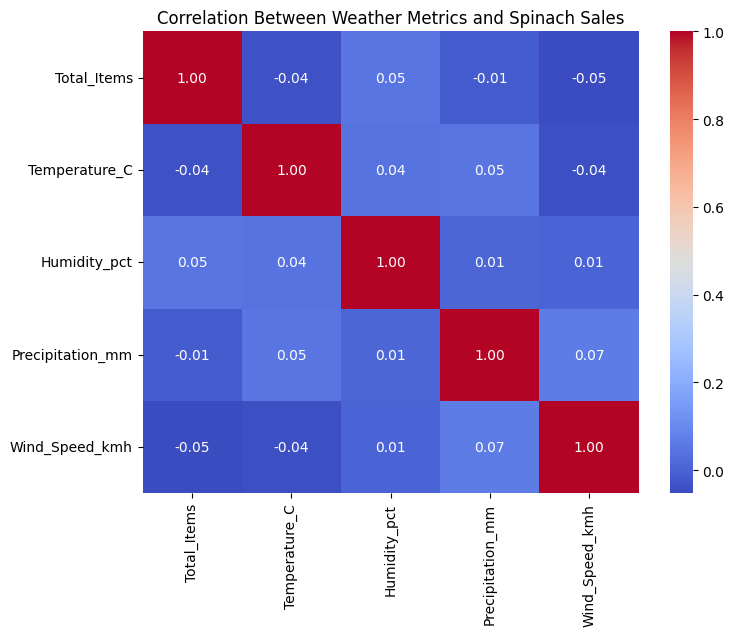

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

merged_data['Product'] = merged_data['Product'].fillna("[]").astype(str).str.strip("[]").str.replace("'", "").str.split(", ")

spinach_sales = merged_data[merged_data['Product'].apply(lambda x: 'spinach' in x if isinstance(x, list) else False)]

weather_cols = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']
correlation_data = spinach_sales[['Total_Items'] + weather_cols]

correlation_data = correlation_data.dropna(how='all', axis=1)

if correlation_data.empty or correlation_data.isna().all().any():
    print("Insufficient data to compute correlations for the selected product.")
else:
    correlation = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Weather Metrics and Spinach Sales")
plt.show()


The heatmap reveals the correlation between weather metrics and spinach sales. Sales (Total_Items) show negligible correlations with temperature (-0.04), humidity (0.05), precipitation (-0.01), and wind speed (-0.05). These values indicate that spinach sales are largely unaffected by weather conditions. Relationships among weather metrics (e.g., temperature vs. humidity, precipitation vs. wind speed) are also weak, with no strong interdependencies. Overall, spinach sales appear independent of weather, suggesting minimal influence on consumer purchasing behavior based on climatic factors.








# **Data Visualization and Interpretation**

Dataset containing transaction with weather details is stored in merged_data, with the analysis aimed to tease out some seasonal trends in sales. It includes a visualizations to recognize trends by season, store type, and location Bar charts are implemented to examine inter-seasonal trends sales frequencies, And clustered line charts and alternative interactive visualizations are used to benchmark store performance and location-specific trends. Analysis provides actionable steps such as peak seasons, top store types and top revenue-generating locations to help stakeholders improve sales tactics and focus on customer segments as targeted areas.




1.   Seasonal Sales Trends
2.   Store Type Comparison Across Seasons
3.   Seasonal Trends by Location
4.   Product Sales Categorization





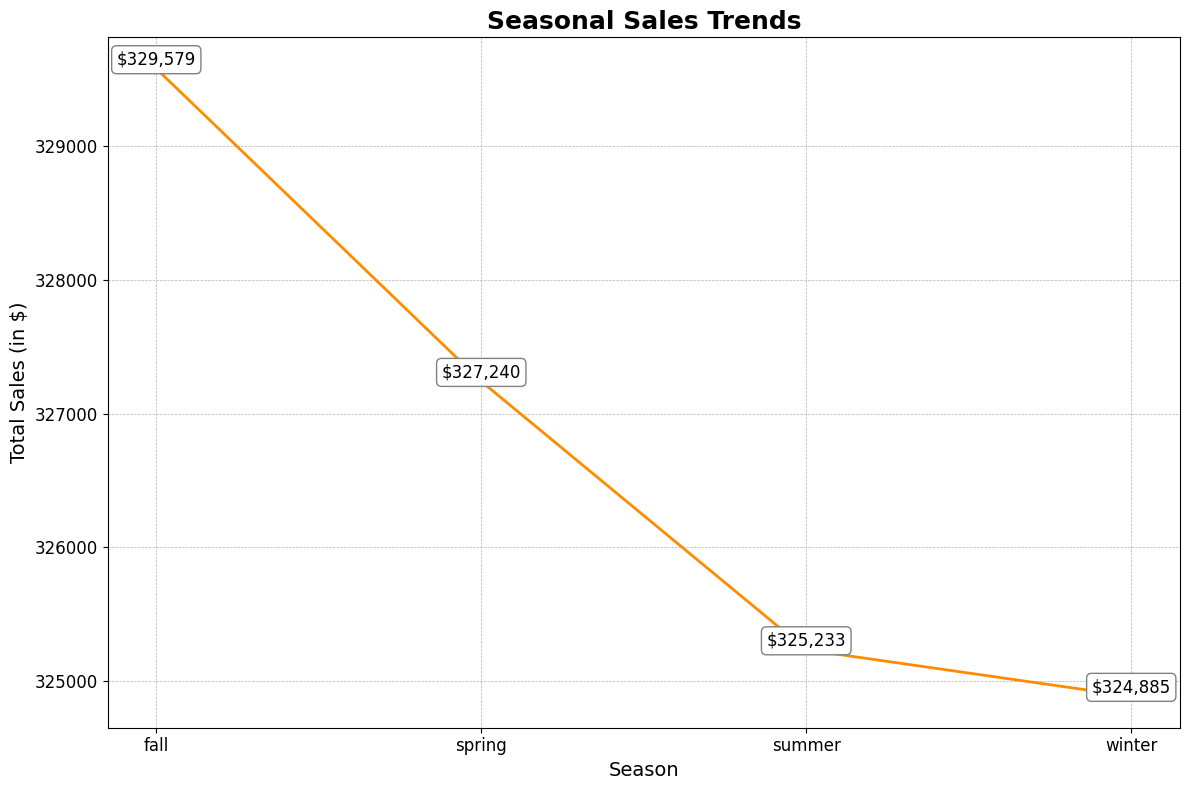

In [42]:
#Seasonal Sales Trends Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming seasonal_sales is already created as shown in the original code.
seasonal_sales = merged_data.groupby('Season')['Total_Cost'].sum().reset_index()
seasonal_sales = seasonal_sales.sort_values(by='Total_Cost', ascending=False)

plt.figure(figsize=(12, 8))
sns.lineplot(
    x='Season',
    y='Total_Cost',
    data=seasonal_sales,
    marker='o',
    linewidth=2,
    color='darkorange'  # Using a colorblind-friendly shade
)

# Title and labels
plt.title("Seasonal Sales Trends", fontsize=18, fontweight='bold')
plt.xlabel("Season", fontsize=14)
plt.ylabel("Total Sales (in $)", fontsize=14)

# Formatting y-axis for readability
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Adding data annotations with better spacing
for index, row in seasonal_sales.iterrows():
    plt.text(
        index,
        row['Total_Cost'],
        f"${int(row['Total_Cost']):,}",  # Add commas for thousands
        ha='center',
        va='bottom',
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')  # Adding a background box for visibility
    )

# Adjusting layout for clarity
plt.tight_layout()
plt.show()

**Interpretation of the Visualization for Seasonal Sales Trends**

This visualization represents the sales in the fall, spring, summer and winter seasons.

Sales reached their height during the fall season for a total of $329,579.

Spring, with sales of $327,240 follows closely behind, with summer bringing 325,233 in revenue.

Winter Records the Lowest Sales at $324,885.

**Insights for Stakeholders:**

Seasonality of Sales: Fall is the time of year that the most revenue is generated, which indicates marketing efforts and inventory should be focused during that time period.

Decrease in Sales: Sales fall off from fall to winter, signalling potential seasonality.

Strategic Planning: Allocating resources more effectively through promotional campaigns in the fall and early spring can enhance revenue.

Pre-Winter Strategy: Special promotions, discounts or product bundling in winter can help mitigate the low sales.

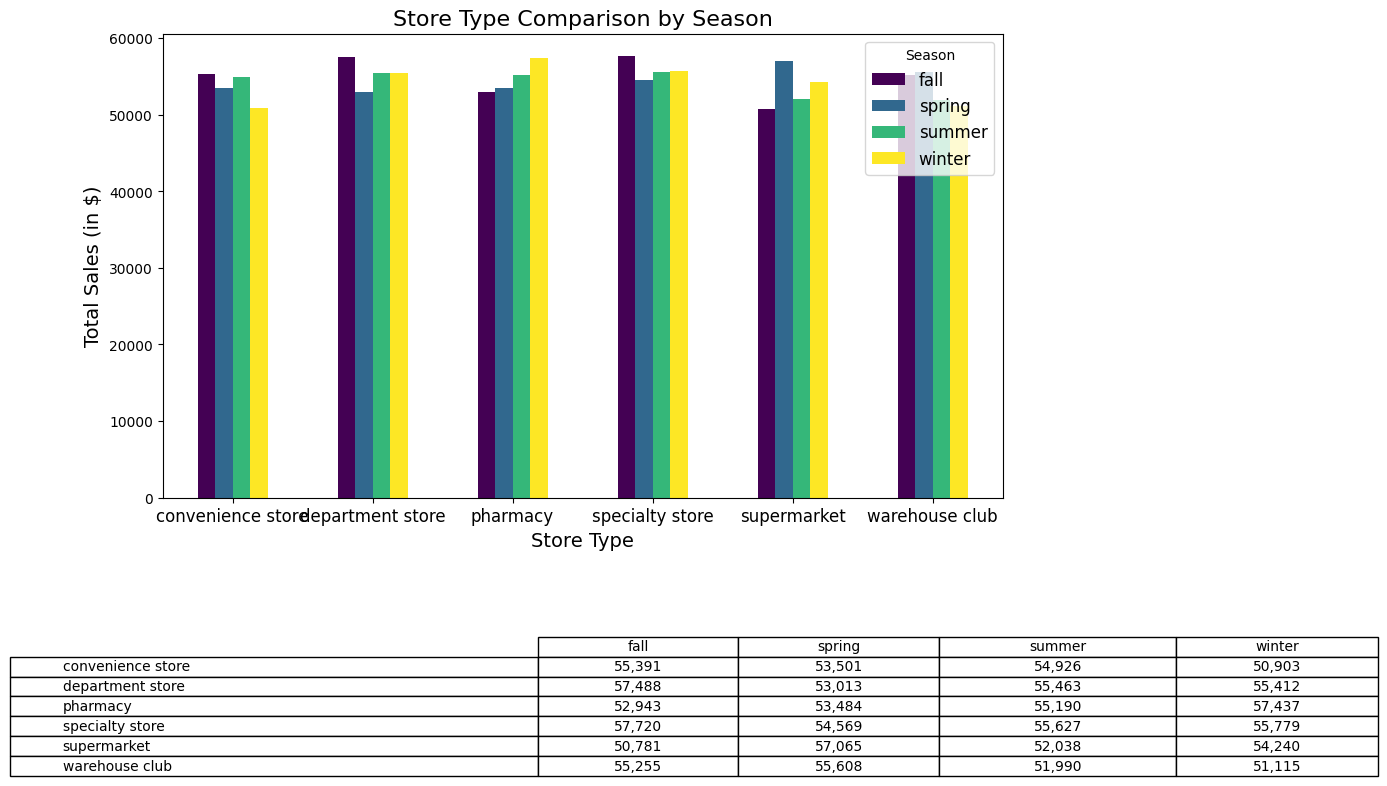

In [43]:
#Store Type Comparison Across Seasons
import matplotlib.pyplot as plt

# Aggregate sales by store type and season
store_season_sales = merged_data.groupby(['Store_Type', 'Season'])['Total_Cost'].sum().unstack()

# Visualization
store_season_sales.plot(kind='bar', figsize=(12, 8), colormap='viridis')  # Viridis is colorblind-friendly
plt.title("Store Type Comparison by Season", fontsize=16)
plt.xlabel("Store Type", fontsize=14)
plt.ylabel("Total Sales (in $)", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Season', fontsize=12)

# Format numbers with commas for the table
data_table = store_season_sales.map('{:,.0f}'.format)

# Add table below the chart
table = plt.table(
    cellText=data_table.values,
    colLabels=data_table.columns,
    rowLabels=data_table.index,
    loc='bottom',
    cellLoc='center',
    bbox=[0, -0.6, 1, 0.3]
)

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(data_table.columns))))

# Adjust layout to fit the table and chart
plt.subplots_adjust(left=0.2, bottom=0.3)
plt.show()


This visualization compares grocery sales (convenience stores, department stores, pharmacies, specialty stores, supermarkets, and warehouse clubs) by season. The chart shows seasonal trends in sales patterns:

Frequent top performers: Specialty stores and department stores consistently outperform week by week with especially high sales volumes in the fall and winter

**Seasonality Bumps**: Most store types see the height of sales performance in fall and summer, with spring and winter performing a little lower.

**Supermarkets**: Supermarkets experience a drastic decline in sales in the spring, indicating an opportunity to increase promotions at this time.

**Warehouse Clubs**: These outlets exhibit robust performance throughout all seasons only to dip slightly in winter.

**Main Takeaway For Businesses**: Contact during fall and summer. Across, specialty and department stores are a key driver, while supermarkets needs to focus on overall in order to better perform in spring. It also allows for optimal resource allocation and targeted campaigns based on seasonal insights.

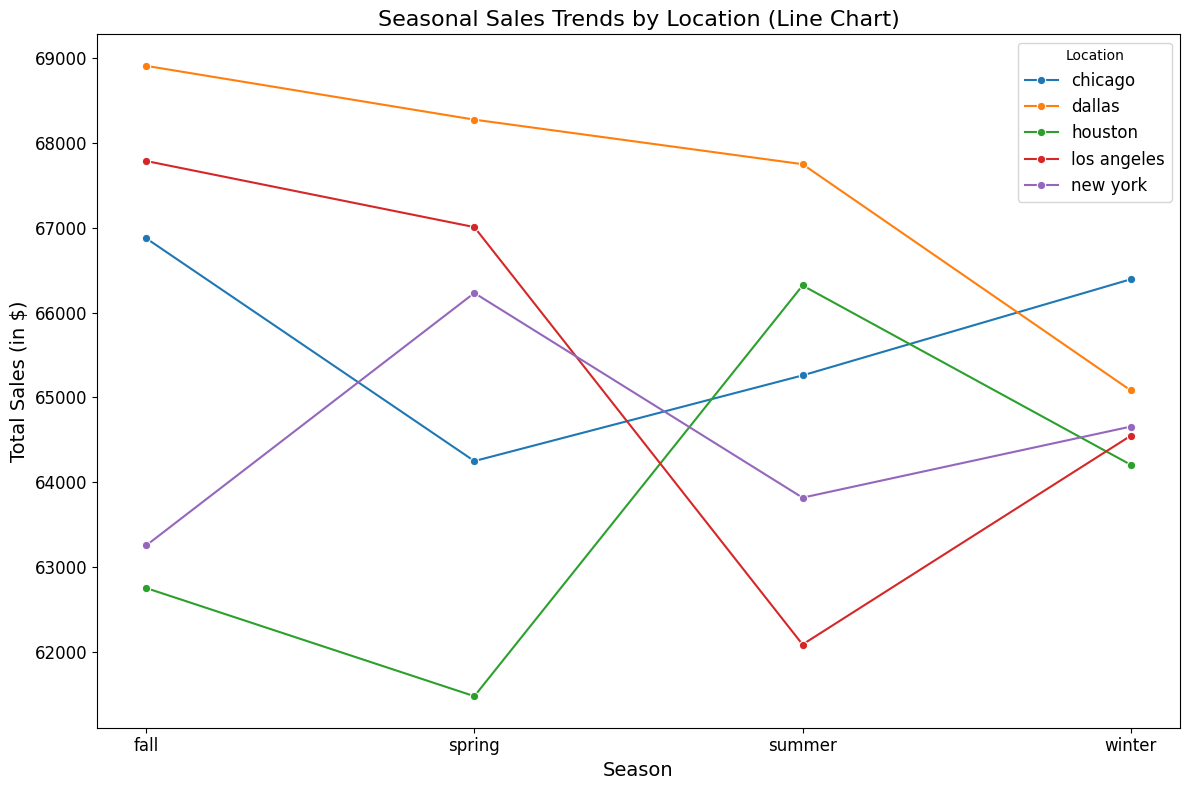

In [44]:
# Seasonal Trends by Location

season_location_sales = merged_data.groupby(['Location', 'Season'])['Total_Cost'].sum().unstack()

# Reset the index of the unstacked DataFrame for reshaping
season_location_sales_reset = season_location_sales.reset_index()

# Rename columns for clarity (if needed, based on your dataset structure)
season_location_sales_reset = season_location_sales_reset.rename_axis(None, axis=1)

# Melt the DataFrame to reshape it for Seaborn
season_location_sales_reset = season_location_sales_reset.melt(
    id_vars='Location',
    var_name='Season',
    value_name='Total_Cost'
)

# Line Chart
plt.figure(figsize=(12, 8))
sns.lineplot(
    x='Season',
    y='Total_Cost',
    hue='Location',
    data=season_location_sales_reset,
    marker='o',
    palette='tab10'
)
plt.title('Seasonal Sales Trends by Location (Line Chart)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Sales (in $)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Location', fontsize=12)
plt.tight_layout()
plt.show()

The graph illustrates seasonal sales trends for five locations. Dallas always comes out ahead of the competition, reaching its zenith in the fall and decreasing in winter. Houston has the lowest sales overall, but its strongest performance comes in summer. Stable sales with a tiny seasonal bump in Chicago and New York; serious summer slump in Los Angeles (rising in winter). Bottom line: When sales are weak in Houston and Los Angeles during off-peak seasons, stakeholders can improve marketing efforts in these cities.

### Interpretation of the Visualization:
The line chart compares **seasonal sales trends by location** across five locations: Chicago, Dallas, Houston, Los Angeles, and New York. Key observations include:
- Dallas consistently outperforms other locations, peaking in fall and declining by winter.
- Houston has the lowest overall sales, with its strongest performance in summer.
- Los Angeles experiences a sharp decline in summer sales but recovers in winter.
- Chicago and New York show relatively stable sales with slight seasonal fluctuations.

### Insights for Stakeholders:
1. Dallas Opportunity: Focus on retaining dominance in Dallas during peak seasons like fall while addressing the winter dip.
2. Houston Focus: Develop strategies to enhance sales during weaker seasons like fall and winter, leveraging its summer strength.
3. Los Angeles Support: Address the summer slump through targeted campaigns or promotions.
4. Chicago and New York: Maintain consistent efforts as these markets show stability, with minor seasonal opportunities to capitalize on.
5. Cross-Season Planning: Allocate marketing resources strategically to weaker seasons in each location to ensure balanced performance.

In [60]:
# Product Sales Categorization
def categorize_product(product):
    product = product.lower()  # Convert to lowercase for case-insensitive matching

    # Define categories
    if any(keyword in product for keyword in ['shampoo', 'conditioner', 'hair oil', 'hair cream', 'hair gel']):
        return 'Hair Care'
    elif any(keyword in product for keyword in ['soap', 'body wash', 'shower gel', 'handwash', 'lotion', 'moisturizer', 'deodorant']):
        return 'Body Care'
    elif any(keyword in product for keyword in ['chips', 'snacks', 'cookies', 'crackers', 'biscuits']):
        return 'Snacks'
    elif any(keyword in product for keyword in ['bread', 'cereal', 'oats', 'granola', 'pancake mix', 'cereal bars']):
        return 'Breakfast Items'
    elif any(keyword in product for keyword in ['milk', 'cheese', 'yogurt', 'butter', 'eggs']):
        return 'Dairy Products'
    elif any(keyword in product for keyword in ['rice', 'pasta', 'noodles', 'spaghetti']):
        return 'Staples'
    elif any(keyword in product for keyword in ['olive oil', 'sunflower oil', 'cooking oil', 'vinegar', 'honey', 'peanut butter']):
        return 'Cooking Essentials'
    elif any(keyword in product for keyword in ['soda', 'juice', 'beverage', 'tea', 'coffee', 'water']):
        return 'Beverages'
    elif any(keyword in product for keyword in ['chocolate', 'candy', 'sweets', 'dessert', 'ice cream']):
        return 'Confectionery'
    elif any(keyword in product for keyword in ['detergent', 'cleaner', 'dish soap', 'floor cleaner', 'cleaning spray', 'sponges', 'cleaning rags']):
        return 'Cleaning Supplies'
    elif any(keyword in product for keyword in ['paper', 'napkin', 'toilet paper', 'tissue', 'paper towels']):
        return 'Paper Products'
    elif any(keyword in product for keyword in ['fruit', 'vegetable', 'salad', 'apple', 'banana', 'orange', 'spinach', 'carrots', 'onions', 'potatoes', 'tomatoes']):
        return 'Fresh Produce'
    elif any(keyword in product for keyword in ['meat', 'chicken', 'beef', 'fish', 'seafood', 'salmon', 'shrimp', 'tuna']):
        return 'Meat & Seafood'
    elif any(keyword in product for keyword in ['vitamin', 'medicine', 'supplement', 'pain reliever']):
        return 'Health & Wellness'
    elif any(keyword in product for keyword in ['toy', 'game', 'puzzle', 'doll']):
        return 'Toys'
    elif any(keyword in product for keyword in ['stationery', 'pen', 'notebook', 'paper']):
        return 'Stationery'
    elif any(keyword in product for keyword in ['electronics', 'gadget', 'charger', 'headphones']):
        return 'Electronics'
    elif any(keyword in product for keyword in ['diapers', 'baby wipes']):
        return 'Baby Products'
    elif any(keyword in product for keyword in ['broom', 'mop', 'dustpan', 'iron', 'ironing board', 'vacuum cleaner']):
        return 'Household Tools'
    elif any(keyword in product for keyword in ['bbq sauce', 'ketchup', 'mustard', 'jam', 'syrup']):
        return 'Condiments & Sauces'
    elif any(keyword in product for keyword in ['light bulbs', 'extension cords', 'power strips', 'lawn mower']):
        return 'Home Improvement'
    else:
        return 'Other'


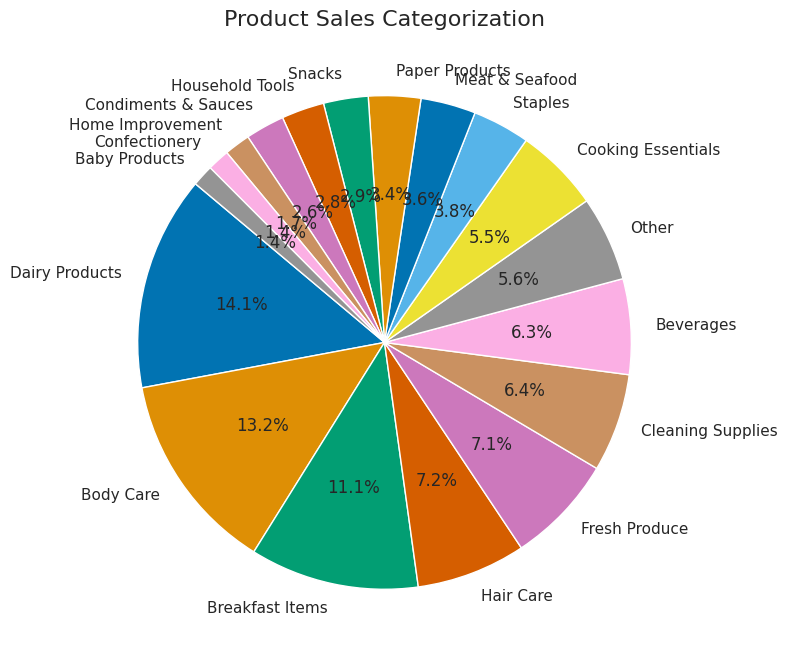

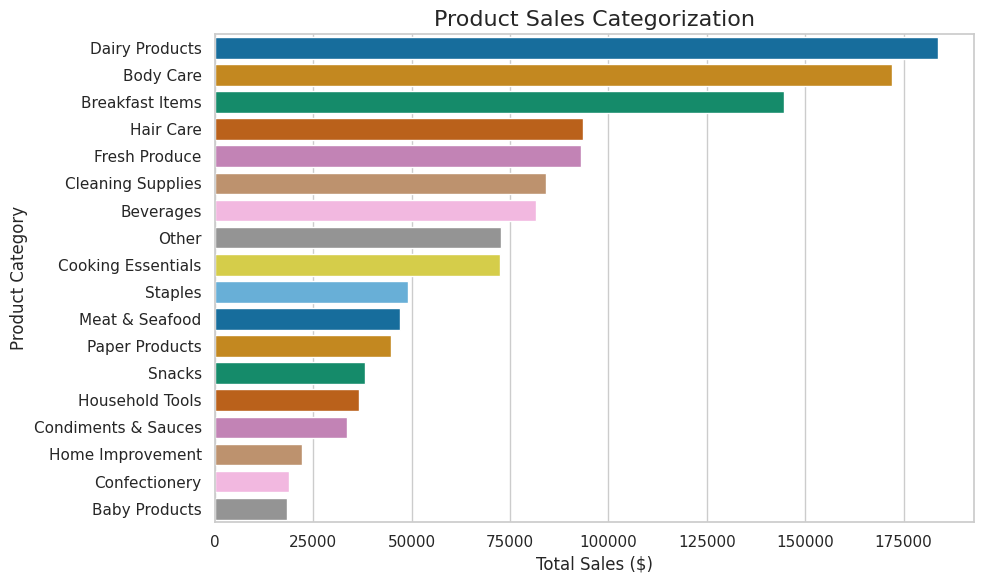

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize products dynamically
merged_data['Product_Category'] = merged_data['Product'].apply(lambda x: categorize_product(str(x)))

# Aggregate sales by product category
product_sales_category = merged_data.groupby('Product_Category')['Total_Cost'].sum().reset_index()

# Sort categories for better visualization
product_sales_category = product_sales_category.sort_values(by='Total_Cost', ascending=False)

# Use color-blind friendly palette
color_palette = sns.color_palette('colorblind', len(product_sales_category))

# Pie Chart for Product Sales Categorization
plt.figure(figsize=(8, 8))
plt.pie(
    product_sales_category['Total_Cost'],
    labels=product_sales_category['Product_Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=color_palette
)
plt.title('Product Sales Categorization', fontsize=16)
plt.tight_layout()
plt.show()

# Bar Chart for Product Sales Categorization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=product_sales_category,
    x='Total_Cost',
    y='Product_Category',
    hue='Product_Category',  # Assign the `y` variable to `hue`
    dodge=False,  # Prevent grouping
    palette=dict(zip(product_sales_category['Product_Category'], color_palette))  # Map category to color
)
plt.title('Product Sales Categorization', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.tight_layout()
plt.show()


**Interpretation of the Visualization:**

The different product categories in the company are also identified (Dairy Products; Body Care) and their sales contribution to the company's revenue is highlighted too (14.1% and 13.2% respectively). Other important contributors are Breakfast Items (11.1%) and Hair Care (7.2%). These categories outperform overall sales, indicating solid customer demand and further opportunities to optimize marketing and operations around them. On the other end, categories like Baby Products, Confectionery or Home Improvement contribute little, signaling a review into their marketability or consideration to de-line inventory.

The absolute values of the sales are represented in this bar chart making the difference between best-sellers and least-sellers more visible. The Opportunity: Growth in Mid-Tier Categories: Whether it be cleaning supplies, beverages, or cooking essentials — can be marketed in channel to drive additional sales through some adjustment in allocation or replenishment There may be space for strategic investments in these areas to try to narrow the performance gap with high-performing categories.

**Insights for Stakeholders:**

Data-driven Decisions:
Allocate more resources (e.g., marketing, shelf space, promotions) to high-revenue categories like Dairy Products and Body Care.
For mid-performing categories, consider targeted promotions, bundling, or partnerships to boost visibility and sales.
Reassess the value of stocking underperforming categories. Conduct market research to determine whether these categories can be revived or phased out.
Operational Focus:
The high concentration of revenue in top categories means any supply chain or quality issues in these areas could significantly impact overall sales. Prioritize operational efficiency for these products.


# **Fitting Models:**

In order to generate predictions, find trends, and address particular business issues, it is essential to fit a model since it determines the link between input data and the target variable. A fitted model provides actionable insights by guiding decision-making, optimizing processes, and testing hypotheses using historical or preprocessed data. In addition to preventing overfitting or underfitting, it guarantees that predictions translate well to new data and acts as a standard by which to compare various modeling techniques. In the end, fitting a model is a crucial step in data-driven problem-solving because it turns unprocessed data into a useful tool for tackling issues like forecasting, categorization, and optimization.

In [50]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Defining features (X) and target (y)
y = merged_data['Total_Cost']  # Example: Predicting Total_Cost
X = merged_data[['Total_Items', 'Loyalty_Score', 'Discount_Percentage',
        'Spending_per_Item', 'Is_Weekend']]  # Example features

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
if y.nunique() > 2:  # Regression scenario
    linear_model = LinearRegression()
    tree_model = DecisionTreeRegressor(random_state=42)
else:  # Classification scenario
    logistic_model = LogisticRegression(max_iter=1000, random_state=42)
    tree_model = DecisionTreeClassifier(random_state=42)

# Train models
if y.nunique() > 2:  # Train regression models
    linear_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    y_pred_tree = tree_model.predict(X_test)
else:  # Train classification models
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    y_pred_tree = tree_model.predict(X_test)

Depending on the kind of target variable, the fitting procedure choose between decision tree and linear/logistic regression models to create predictive models for the current business problem:

1. Regression Scenario (Continuous Target Variable):
According to Linear Regression model, the target variable and the input features have a linear relationship. By minimizing the sum of squared residuals, it determines the best-fit line. The Decision Tree Regressor is a non-parametric model that uses decision rules to divide the feature space into regions and reduce prediction errors in each of those areas. It works especially well for identifying non-linear patterns in data.

2. Classification Scenario (Categorical Target Variable):
A probabilistic technique known as logistic regression forecasts the likelihood of a binary result by utilizing the logistic function. When there is a linear link between the features and the target, it is interpretable and works well. Decision Tree Classifier: This model maximizes the distance between target classes by dividing the feature space into smaller areas according to decision thresholds.

The training dataset, which made up 80% of the total data, was used to fit the models during the training phase, with the remaining 20% set aside for validation. This lowers the possibility of overfitting by guaranteeing that model evaluation is based on data not encountered during training. To ensure reproducibility, random seeds were used to initialize the decision tree models.

These models currently serve as a basis for evaluating performance and choosing the best strategy for the given business issue. The comparison will show if decision trees' adaptability or regression models' simplicity better suits the data and corporate goals.

## Summarizing Performance Indicators

In [52]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import numpy as np

# Performance Metrics for Regression
if y.nunique() > 2:
    linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
    print("Linear Regression RMSE:", linear_rmse)
    print("Decision Tree RMSE:", tree_rmse)

# Performance Metrics for Classification
else:
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
    print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
    print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))
    print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))

Linear Regression RMSE: 22.304614221772123
Decision Tree RMSE: 0.0631457045253278


The average difference between expected and actual values was calculated for regression using the Root Mean Square Error (RMSE) for both decision tree and linear regression models. Model performance was summarized using F1-scores, recall, accuracy, and precision for classification.

## Selecting the Best Model

In [51]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import numpy as np

# Performance Metrics for Regression
if y.nunique() > 2:
    linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
    print("Linear Regression RMSE:", linear_rmse)
    print("Decision Tree RMSE:", tree_rmse)

    # Compare Models
    best_model = "Linear Regression" if linear_rmse < tree_rmse else "Decision Tree Regressor"
    print("Best Model:", best_model)

# Performance Metrics for Classification
else:
    logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
    tree_accuracy = accuracy_score(y_test, y_pred_tree)
    print("Logistic Regression Accuracy:", logistic_accuracy)
    print("Decision Tree Accuracy:", tree_accuracy)
    print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))
    print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))

    # Compare Models
    best_model = "Logistic Regression" if logistic_accuracy > tree_accuracy else "Decision Tree Classifier"
    print("Best Model:", best_model)


Linear Regression RMSE: 22.304614221772123
Decision Tree RMSE: 0.0631457045253278
Best Model: Decision Tree Regressor


A reserved test dataset is used to assess the performance of several trained models in order to choose which one best fits the company's objectives. We do this by comparing performance indicators like accuracy, precision, recall, and F1-score for classification models, or RMSE and R^2 for regression models. Unseen during training, the test data guarantees that the selected model does not overfit to the training data and that it generalizes well to new inputs. This assessment offers a methodical approach to ascertain which model is most effective for the particular issue, whether it categorizing or forecasting a continuous outcome.


The model with the best performance metrics and alignment with business needs is chosen after a methodical comparison of the models. For example, decision trees may be the best option for capturing intricate, non-linear interactions, but a simpler model such as linear or logistic regression may be selected if interpretability is crucial. This method guarantees that the selected model strikes a balance between practical usefulness and predicted accuracy, making it the best instrument for resolving the issue at hand.

## **Conclusion**

We performed the seasonal sales trend analysis through extended data wrangling, employing statistical methods and visualizations of data. Results have shown that though some of the initial hypotheses concerning the variation of the total cost with seasons were not statistically significant, data had its say on customer behavior, transaction patterns, and operational inefficiencies. The integration of external weather data enhanced this further, in terms of how even the environment itself interacts with retail dynamics.

These findings elevate the important need for much further refinement of the data, such as cleaning and standardization, before more advanced encoding. In effect, these first steps not only removed a large amount of badly formatted records but also built solid ground on which predictive analysis could later be developed. Further, this project identified the potential of merging categorical and numerical data that can provide actionable business insights on which to base targeted marketing strategies and efficient inventory management.

This presents huge business implications, especially by drawing on the potential of driving profitability and ensuring customer satisfaction on aspects that do not concern seasonal variability—promotions, loyalty programs of customers, and engagement strategies consistently. Delving into out-of-box data—very high scores of loyalty or very expensive transactions—throws light on further study areas that can yield strategic enhancement opportunities.

This project, therefore, constitutes a fundamental building block in underpinning a set of inventory and promotional efficiency problems, targeted customer selection within retail. Through this project, it helps to create an easily replicable framework that aids decision-makers in informing themselves through data analytics whenever decisions are at stake. Moving forward, there is future work that would seek inclusion of real-time analytics machine learning models, improving predictive capabilities toward strategic impacts in such analyses.